# **Name:- Amany Azzam   ___   ID:-(20399133) **




# **Define the problem**

---
i have some features for the product and i need to predict the product rating to help Wish.com to know if this priduct will be good for people or not to publish the product on the website or not


---


The **goal** is to predict product ratings based on other information available about a product on Wish.com. The rating range from 1 to 5. The higher the rating for a product, the more satisfied for the customers. When you have a new product to list on wish.com, you may use this model to predict how probable people will like it before actually listing it. Also , by doing so, we may better determine under what circumstances a product will be highly rated, as well as the wish.com consumer base.



# **What is the input?**
the input is the features of the product to predict the rating value but the model will select this features from the data input


---


*   price
*   retail_price
*   units_sold
*   uses_ad_boosts
*   rating
*   rating_count
*   badges_count
*   badge_product_quality
*   badge_fast_shipping
*   product_color
*   product_variation_size_id
*   product_variation_inventory
*   shipping_option_price
*   has_urgency_banner
*   origin_country
*   merchant_rating_count
*   merchant_rating_count
*   merchant_rating
*  merchant_has_profile_picture

# **What is the output?**
the out put is the prediction rating for the input product

# **What data mining function is required?**
I will use this model to find the pattern i will use to predict the rating of the product


---


the data mining function i used are


*   load the data
*   clean the data
*   drop columns which has unique value
*   fill the null values
*   drop columns that not important in the training model
*   handle the columns which has Inconsistent Data Entry
*   convert the categorical data to numirical data




# **What could be the challenges?**
the callenges was how to find the problems in the data and how to deal with this problems like

* how to deal with unique values
* how to deal with Inconsistent Data Entry
* how to deal with the not important features
* how to deal with categorical data
* how to deal with nan values


---


for the models was there many challenges like

* how to chose the optimal hyperparameters
* how to improve the performance of the models
* how to find the best f1-score

# **What is an ideal solution?**
ideal best solution will be the maximum value is decision tree

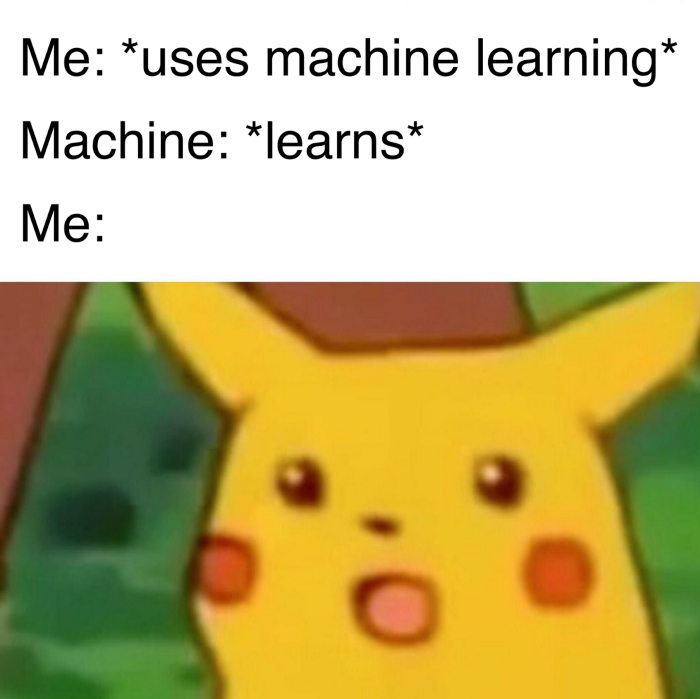

In [1]:
#import libraries and packages 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, roc_auc_score

In [2]:
#Load the data for training
data_train  = pd.read_csv("/content/train_new.csv" , index_col= 0)
#Load the data for testing
test = pd.read_csv("/content/test_new.csv" , index_col= 0)

In [3]:
# show the first rows from the training dataset
data_train.head()

,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
price,,,,,,,,,,,,,,,,,,,,,
8.00,7,EUR,10000,1,4.0,1670,0,0,0,0,...,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,272
8.00,7,EUR,1000,0,4.0,843,1,1,0,0,...,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0,NaN,summer,2020-08,1515
6.00,34,EUR,100,0,4.0,10,0,0,0,0,...,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0,NaN,summer,2020-08,940
4.67,4,EUR,100,1,3.0,82,0,0,0,0,...,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,583141fbfef4094e51453d9b,0,NaN,summer,2020-08,309
8.00,11,EUR,1000,0,4.0,127,0,0,0,0,...,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,5d3bc9f8e13a7e654424a4cb,0,NaN,summer,2020-08,226


In [4]:
# describe the data to know count , mean , min , 25% , 50% , 75% and Max for each row
data_train.describe()

,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,id
count,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,349.0,1.094000e+03,1094.000000,1094.000000,1094.000000
mean,23.712066,4518.661792,0.432358,4.006399,915.523766,0.114260,0.019196,0.083181,0.011883,32.807130,2.344607,0.002742,40.484461,49.849177,1.0,2.678399e+04,4.036191,0.155393,772.207495
std,31.802661,9825.608568,0.495630,0.585706,2037.561158,0.348461,0.137275,0.276282,0.108409,21.454655,1.044781,0.052318,20.196229,2.480687,0.0,8.616171e+04,0.200397,0.362445,453.784430
min,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,8.000000,1.000000,1.0,4.000000e+00,2.941176,0.000000,2.000000
25%,7.000000,100.000000,0.000000,4.000000,24.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2.000000,0.000000,31.000000,50.000000,1.0,1.926000e+03,3.918464,0.000000,382.250000
50%,10.000000,1000.000000,0.000000,4.000000,143.500000,0.000000,0.000000,0.000000,0.000000,50.000000,2.000000,0.000000,40.000000,50.000000,1.0,8.225000e+03,4.045170,0.000000,752.500000
75%,26.000000,5000.000000,1.000000,4.000000,845.500000,0.000000,0.000000,0.000000,0.000000,50.000000,3.000000,0.000000,43.000000,50.000000,1.0,2.306200e+04,4.166826,0.000000,1166.500000
max,252.000000,100000.000000,1.000000,6.000000,20744.000000,3.000000,1.000000,1.000000,1.000000,50.000000,12.000000,1.000000,140.000000,50.000000,1.0,2.174765e+06,4.577519,1.000000,1572.000000


In [5]:
# print shape of data to know number of rows and columns
print("Size/Shape of the dataset: ",data_train.shape)       

Size/Shape of the dataset:  (1094, 33)


In [6]:
# To check if the data have null values or not
print("Checking for null values:\n",data_train.isnull().sum()) 

Checking for null values:
 retail_price                      0
currency_buyer                    0
units_sold                        0
uses_ad_boosts                    0
rating                            0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
tags                              0
product_color                    29
product_variation_size_id        12
product_variation_inventory       0
shipping_option_name              0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner              745
urgency_text                    745
origin_country                   12
merchant_title                    0
merchant_name                     4
merchant_info_subtitle            0
merchant_rating_count             0
merchant_rating                   0
m

In [7]:
# To check the data type for each column in dataset
print("Checking Data-type of each column:\n",data_train.dtypes)

Checking Data-type of each column:
 retail_price                      int64
currency_buyer                   object
units_sold                        int64
uses_ad_boosts                    int64
rating                          float64
rating_count                      int64
badges_count                      int64
badge_local_product               int64
badge_product_quality             int64
badge_fast_shipping               int64
tags                             object
product_color                    object
product_variation_size_id        object
product_variation_inventory       int64
shipping_option_name             object
shipping_option_price             int64
shipping_is_express               int64
countries_shipped_to              int64
inventory_total                   int64
has_urgency_banner              float64
urgency_text                     object
origin_country                   object
merchant_title                   object
merchant_name                    object
merc

In [8]:
# copy column id from test set in _id
_id = test['id']


In [9]:
# copy training data in df and copy test data in test_
df = data_train.copy()
test_ = test.copy()

# **Data cleaning and pre-processing**

1. drop the columns which i don't need them in trainning by trying them many times and didn't found any effect from them in train the models



---


i droped 'currency_buyer', 'theme','crawl_month' because all of them has unique values

'id' not important in the training it's like index for the data

'tages' when i added it didn't give me what i expect from this column so i droped it and get the same results


In [10]:
#drop some columns from training set
df.drop(['currency_buyer', 'theme','crawl_month', 'shipping_option_name','inventory_total','merchant_name','merchant_title','merchant_info_subtitle','id','merchant_profile_picture','urgency_text','countries_shipped_to','merchant_id','shipping_is_express','badge_local_product', 'tags'], axis=1, inplace=True)
#drop some columns from testing set
test_.drop(['currency_buyer', 'theme','crawl_month', 'shipping_option_name','inventory_total','merchant_name','merchant_title','merchant_info_subtitle','id','merchant_profile_picture','urgency_text','countries_shipped_to','merchant_id','shipping_is_express','badge_local_product', 'tags'], axis=1, inplace=True)


# **product_variation_size_id**

<Axes: >

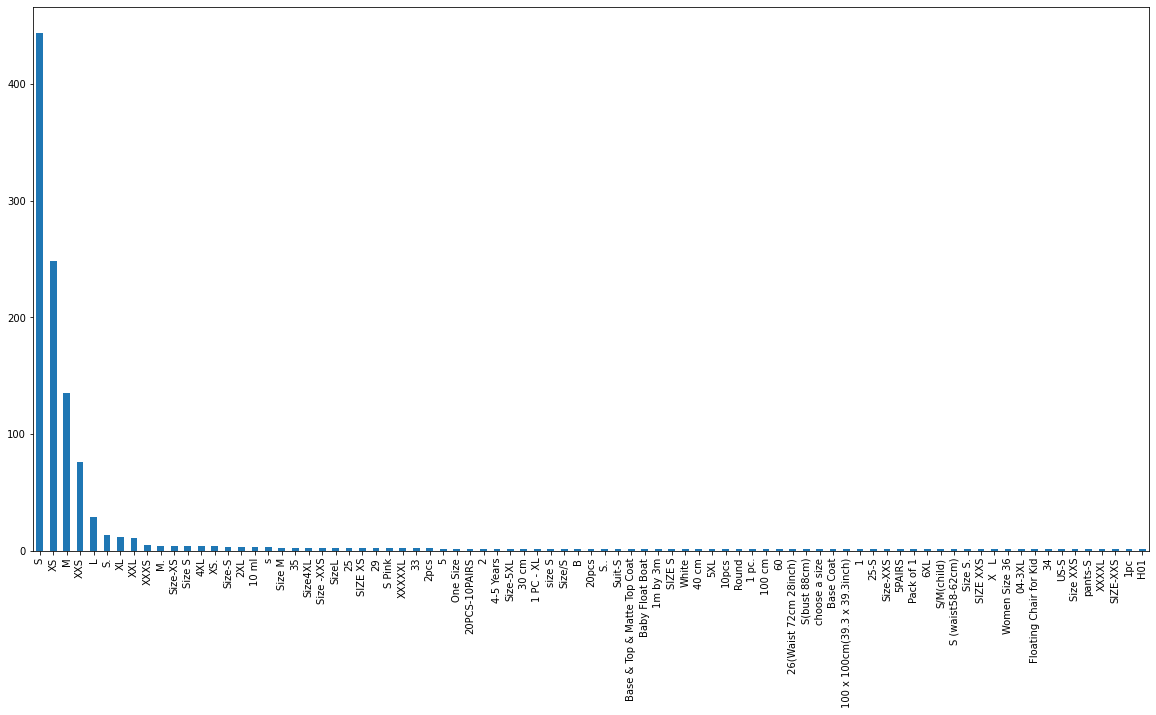

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 10))
df["product_variation_size_id"].value_counts().plot(kind='bar')


Handling the product_variation_size_id column by replace the values which has the same concept but written down in wrong value by the basic one for them and the values with low rows pr doesn't know with keyword 'other'

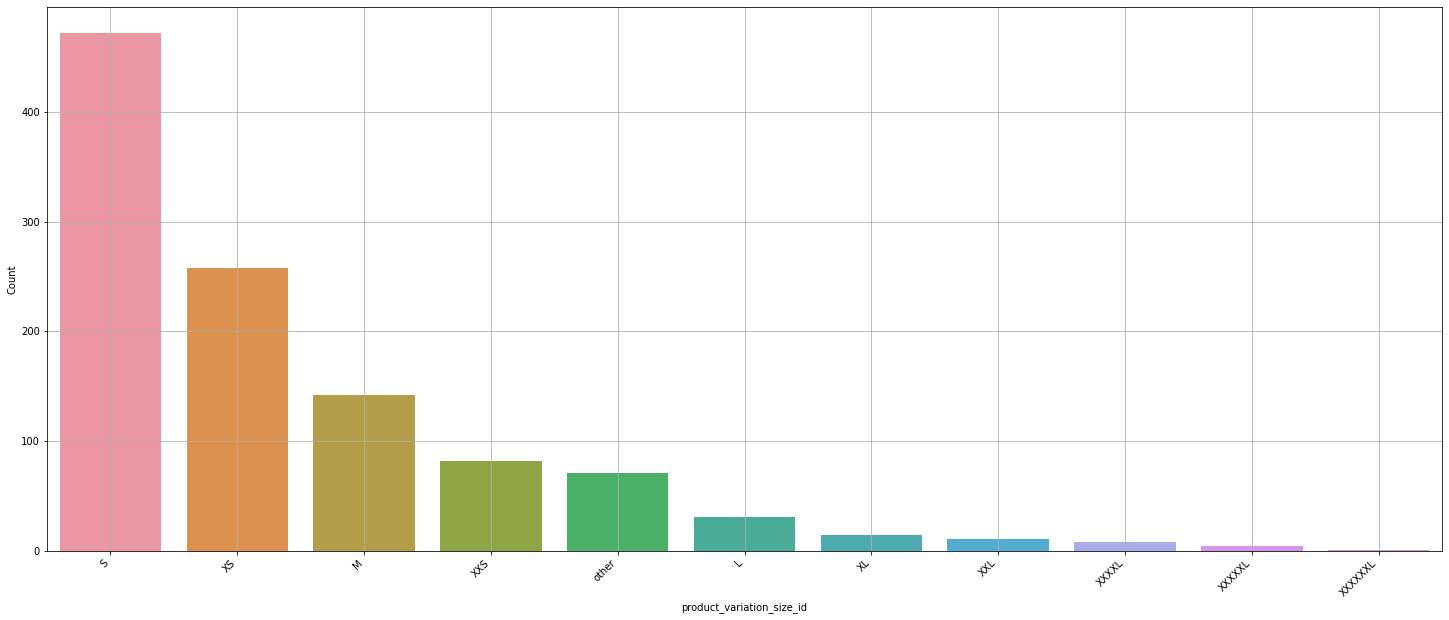

In [12]:
#replace some values have the same concept with the basic one for them
df['product_variation_size_id'] = df['product_variation_size_id'].replace(['S.','Size S','Size-S', 'Size S.','S..','Size/S','SIZE S', 's', 'size S'], 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace(['X   L','1 PC - XL'], 'XL')
df['product_variation_size_id'] = df['product_variation_size_id'].replace(['Size-XXS','SIZE XXS','Size -XXS','SIZE-XXS', 'Size XXS'], 'XXS')
df['product_variation_size_id'] = df['product_variation_size_id'].replace(['XS.','Size-XS','SIZE XS'], 'XS')
df['product_variation_size_id'] = df['product_variation_size_id'].replace(['S/M(child)','M.','Size M'], 'M')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('SizeL', 'L')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('6XL', 'XXXXXXL')
df['product_variation_size_id'] = df['product_variation_size_id'].replace(['Size-5XL','5XL'], 'XXXXXL')
df['product_variation_size_id'] = df['product_variation_size_id'].replace(['04-3XL','4XL','Size4XL'], 'XXXXL')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('2XL ', 'XXL')

#create function to replace other size didn't select in upper term with keyword 'other'
def pr_var_id(name):
    if name == 'S' \
    or name == 'XL' \
    or name == 'XXS' \
    or name == 'XS' \
    or name == 'M' \
    or name == 'L' \
    or name == 'XXXXXXL' \
    or name == 'XXXXXL' \
    or name == 'XXXXL'\
    or name == 'XXL':
        return name
    else:
        return "other"


#apply the function on the column to replace the values
df['product_variation_size_id'] = df['product_variation_size_id'].apply(pr_var_id)

# checking for distribution of product_variation_size_id after handling
fig, ax = plt.subplots(figsize = (25, 10))
sns.countplot(x='product_variation_size_id', data = df, order = df['product_variation_size_id'].value_counts().index, ax = ax)
ax.set(xlabel='product_variation_size_id', ylabel='Count')
plt.xticks(rotation=45, ha='right')
plt.grid()

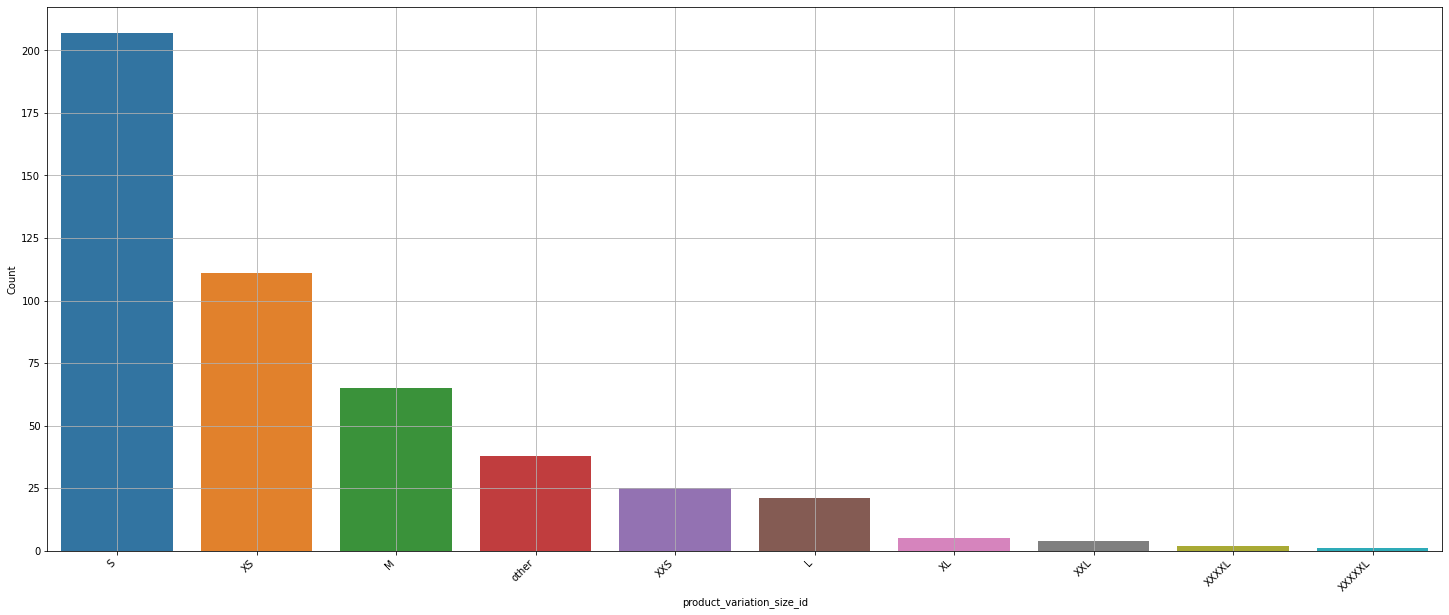

In [13]:
#replace some values have the same concept with the basic one for them
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace(['S.','Size S','Size-S', 'Size S.','S..','Size/S','SIZE S', 's', 'size S'], 'S')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace(['X   L','1 PC - XL'], 'XL')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace(['Size-XXS','SIZE XXS','Size -XXS','SIZE-XXS', 'Size XXS'], 'XXS')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace(['XS.','Size-XS','SIZE XS'], 'XS')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace(['S/M(child)','M.','Size M'], 'M')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('SizeL', 'L')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('6XL', 'XXXXXXL')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace(['Size-5XL','5XL'], 'XXXXXL')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace(['04-3XL','4XL','Size4XL'], 'XXXXL')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('2XL ', 'XXL')


#apply the function on the column to replace the values
test_['product_variation_size_id'] = test_['product_variation_size_id'].apply(pr_var_id)

# checking for distribution of product_variation_size_id after handling
fig, ax = plt.subplots(figsize = (25, 10))
sns.countplot(x='product_variation_size_id', data = test_, order = test_['product_variation_size_id'].value_counts().index, ax = ax)
ax.set(xlabel='product_variation_size_id', ylabel='Count')
plt.xticks(rotation=45, ha='right')
plt.grid()

# **Handling the units_sold column**


 by replace the values which has value less than 10 to be 10 and let the other has the same values

In [14]:
# for train dataset
df['units_sold'] = df['units_sold'].replace(1, 10)
df['units_sold'] = df['units_sold'].replace(8, 10)
df['units_sold'] = df['units_sold'].replace(7, 10)
df['units_sold'] = df['units_sold'].replace(3, 10)
df['units_sold'] = df['units_sold'].replace(2, 10)
df['units_sold'] = df['units_sold'].replace(6, 10)

# for test dataset
test_['units_sold'] = test_['units_sold'].replace(1, 10)
test_['units_sold'] = test_['units_sold'].replace(8, 10)
test_['units_sold'] = test_['units_sold'].replace(7, 10)
test_['units_sold'] = test_['units_sold'].replace(3, 10)
test_['units_sold'] = test_['units_sold'].replace(2, 10)
test_['units_sold'] = test_['units_sold'].replace(6, 10)

# **has_urgency_banner**

In [15]:

#fill nulls with zeros because we have only one value here in train dataset
df['has_urgency_banner']=df['has_urgency_banner'].fillna(0)
df['product_variation_size_id'] = df['product_variation_size_id'].replace(np.nan, 'OTHER')

#fill nulls with zeros because we have only one value here in test dataset
test_['has_urgency_banner']=test_['has_urgency_banner'].fillna(0)
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace(np.nan, 'OTHER')

In [16]:
features_numeric = list(df.select_dtypes(include=['float64', 'int64']))

# categorical features 
features_categorical = list(df.select_dtypes(include=['category','object']))

print('numeric features:', features_numeric)
print('len of numeric features:', len(features_numeric))

print('categorical features:', features_categorical)
print('len of features_categorical:', len(features_categorical))


numeric features: ['retail_price', 'units_sold', 'uses_ad_boosts', 'rating', 'rating_count', 'badges_count', 'badge_product_quality', 'badge_fast_shipping', 'product_variation_inventory', 'shipping_option_price', 'has_urgency_banner', 'merchant_rating_count', 'merchant_rating', 'merchant_has_profile_picture']
len of numeric features: 14
categorical features: ['product_color', 'product_variation_size_id', 'origin_country']
len of features_categorical: 3


# **handling the origin_country feature**

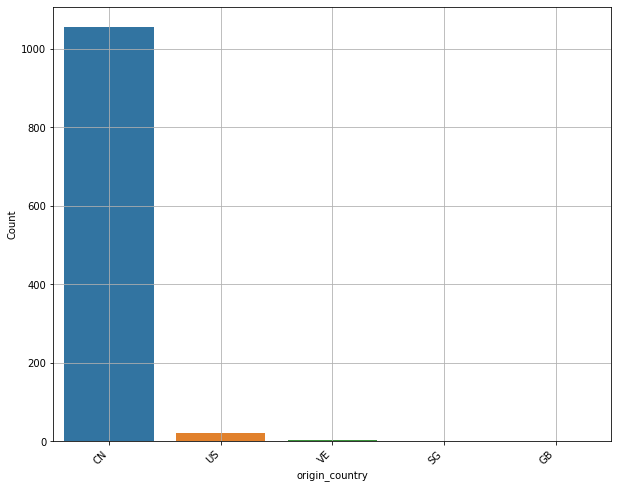

In [17]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.countplot(x = 'origin_country', data = df, order = df['origin_country'].value_counts().index, ax = ax)
ax.set(xlabel='origin_country', ylabel='Count')
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.show()
# as we see from bar chart the column is not balance

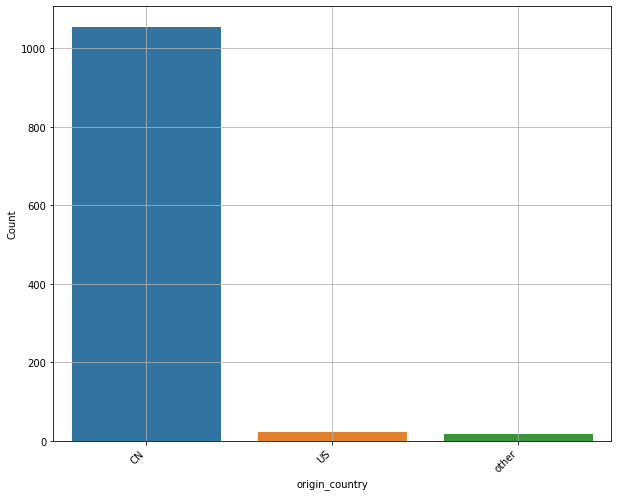

In [18]:
def handle_origin_country(cName):
    if cName == 'CN' \
    or cName == 'US':
        return cName
    else:
        return "other"
# for training dataset
#apply the function on the column to replace the values
df['origin_country'] = df['origin_country'].apply(handle_origin_country)

# checking for distribution of origin_country after handling
fig, ax = plt.subplots(figsize = (10, 8))
sns.countplot(x='origin_country', data = df, order = df['origin_country'].value_counts().index, ax = ax)
ax.set(xlabel='origin_country', ylabel='Count')
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.show()



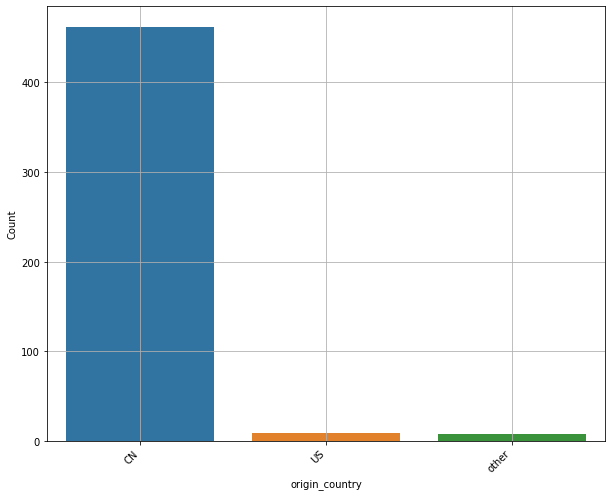

In [19]:
# for training dataset
#apply the function on the column to replace the values
test_['origin_country'] = test_['origin_country'].apply(handle_origin_country)

# checking for distribution of origin_country after handling
fig, ax = plt.subplots(figsize = (10, 8))
sns.countplot(x='origin_country', data = test_, order = test_['origin_country'].value_counts().index, ax = ax)
ax.set(xlabel='origin_country', ylabel='Count')
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.show()

# **handling the product_color feature**

replace the similar colors with the parent color for them and the color i don't know them i but them 'other' as value for them



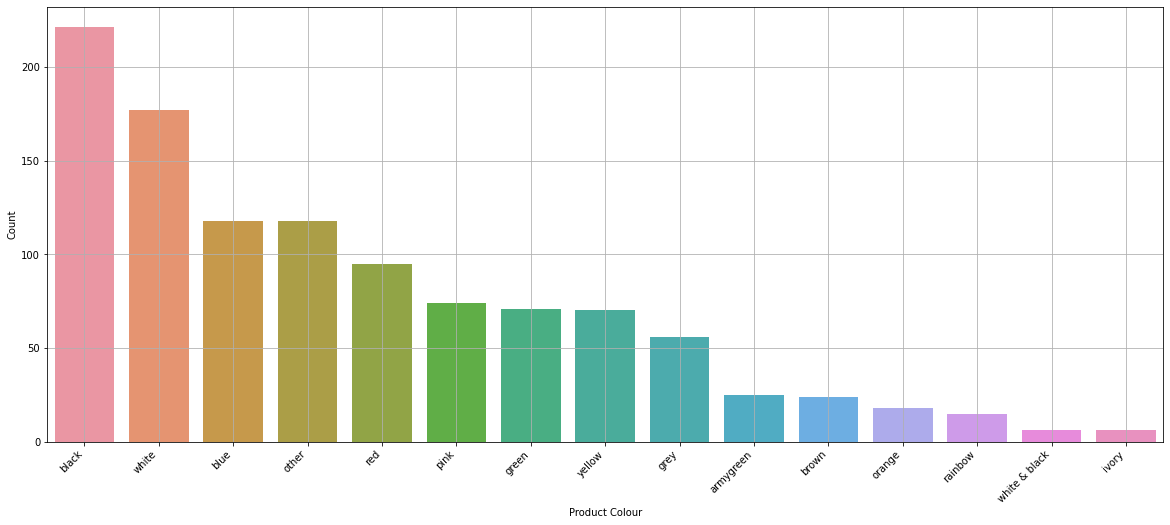

In [20]:
#replace the colors with the basic color for them 
df['product_color'].replace(['nude', 'khaki', 'coffee', 'camel', 'apricot'], 'brown', inplace = True)
df['product_color'].replace(['gray', 'lightgrey', 'lightgray'], 'grey', inplace = True)
df['product_color'].replace('blue & pink', 'pink & blue', inplace = True)
df['product_color'].replace('multicolor', 'rainbow', inplace = True)
df['product_color'].replace('beige', 'ivory', inplace = True)
df['product_color'].replace('coolblack', 'black', inplace = True)
df['product_color'].replace('leopardprint', 'leopard', inplace = True)
df['product_color'].replace('orange-red', 'orange', inplace = True)
df['product_color'].replace('lightyellow', 'yellow', inplace = True)
df['product_color'].replace(['skyblue', 'lakeblue', 'navyblue', 'darkblue', 'lightblue', 'navy blue', 'denimblue'], 'blue', inplace = True)
df['product_color'].replace(['whitefloral', 'offwhite', 'whitestripe'], 'white', inplace = True)
df['product_color'].replace(['lightpink', 'dustypink', 'whitestripe'], 'pink', inplace = True)
df['product_color'].replace(['blackwhite', 'black & white'], 'white & black', inplace = True)
df['product_color'].replace(['winered','rosered' ,'rose','lightred','wine red', 'burgundy','rose red', 'watermelonred'], 'red', inplace = True)
df['product_color'].replace(['army green', 'camouflage', 'army'], 'armygreen', inplace = True)
df['product_color'].replace(['mintgreen', 'darkgreen', 'lightgreen', 'applegreen', 'light green', 'fluorescentgreen'], 'green', inplace = True)


#create function to replace other colors didn't select in upper term with keyword 'other'
def handle_color(cName):
    if cName == 'brown' \
    or cName == 'grey' \
    or cName == 'rainbow' \
    or cName == 'ivory' \
    or cName == 'black' \
    or cName == 'orange' \
    or cName == 'yellow' \
    or cName == 'blue' \
    or cName == 'white'\
    or cName == 'pink'\
    or cName == 'white & black'\
    or cName == 'red'\
    or cName == 'armygreen'\
    or cName == 'green':
        return cName
    else:
        return "other"

#apply the function on the column to replace the values
df['product_color'] = df['product_color'].apply(handle_color)

# checking for distribution of product_color after handling
fig, ax = plt.subplots(figsize = (20, 8))
sns.countplot(x ='product_color', data = df, order = df['product_color'].value_counts().index, ax = ax)
ax.set(xlabel='Product Colour', ylabel='Count')
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.show()


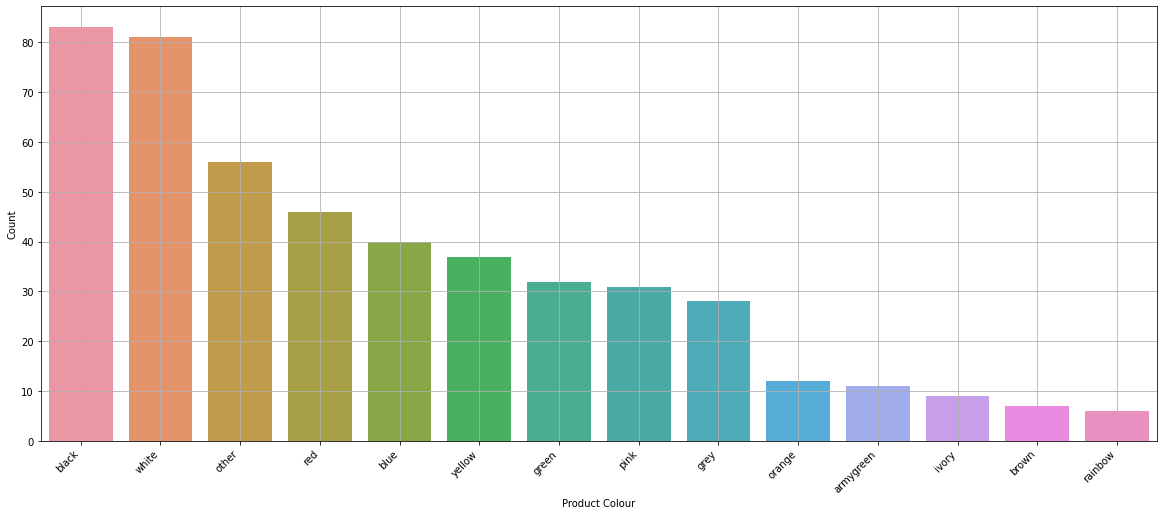

In [21]:
#replace the colors with the basic color for them 
test_['product_color'].replace(['nude', 'khaki', 'coffee', 'camel', 'apricot'], 'brown', inplace = True)
test_['product_color'].replace(['gray', 'lightgrey', 'lightgray'], 'grey', inplace = True)
test_['product_color'].replace('blue & pink', 'pink & blue', inplace = True)
test_['product_color'].replace('multicolor', 'rainbow', inplace = True)
test_['product_color'].replace('beige', 'ivory', inplace = True)
test_['product_color'].replace('coolblack', 'black', inplace = True)
test_['product_color'].replace('leopardprint', 'leopard', inplace = True)
test_['product_color'].replace('orange-red', 'orange', inplace = True)
test_['product_color'].replace('lightyellow', 'yellow', inplace = True)
test_['product_color'].replace(['skyblue', 'lakeblue', 'navyblue', 'darkblue', 'lightblue', 'navy blue', 'denimblue'], 'blue', inplace = True)
test_['product_color'].replace(['whitefloral', 'offwhite', 'whitestripe'], 'white', inplace = True)
test_['product_color'].replace(['lightpink', 'dustypink', 'whitestripe'], 'pink', inplace = True)
test_['product_color'].replace(['blackwhite', 'black & white'], 'white & black', inplace = True)
test_['product_color'].replace(['winered','rosered' ,'rose','lightred','wine red', 'burgundy','rose red', 'watermelonred'], 'red', inplace = True)
test_['product_color'].replace(['army green', 'camouflage', 'army'], 'armygreen', inplace = True)
test_['product_color'].replace(['mintgreen', 'darkgreen', 'lightgreen', 'applegreen', 'light green', 'fluorescentgreen'], 'green', inplace = True)


#create function to replace other colors didn't select in upper term with keyword 'other'
def handle_color(cName):
    if cName == 'brown' \
    or cName == 'grey' \
    or cName == 'rainbow' \
    or cName == 'ivory' \
    or cName == 'black' \
    or cName == 'orange' \
    or cName == 'yellow' \
    or cName == 'blue' \
    or cName == 'white'\
    or cName == 'pink'\
    or cName == 'white & black'\
    or cName == 'red'\
    or cName == 'armygreen'\
    or cName == 'green':
        return cName
    else:
        return "other"

#apply the function on the column to replace the values
test_['product_color'] = test_['product_color'].apply(handle_color)

# checking for distribution of product_color after handling
fig, ax = plt.subplots(figsize = (20, 8))
sns.countplot(x= 'product_color', data = test_, order = test_['product_color'].value_counts().index, ax = ax)
ax.set(xlabel='Product Colour', ylabel='Count')
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.show()


In [22]:

from sklearn.preprocessing import LabelEncoder
df['product_color'] = LabelEncoder().fit_transform(df['product_color'])
df['product_variation_size_id'] = LabelEncoder().fit_transform(df['product_variation_size_id'])
df['origin_country'] = LabelEncoder().fit_transform(df['origin_country'])



test_['product_color'] = LabelEncoder().fit_transform(test_['product_color'])
test_['product_variation_size_id'] = LabelEncoder().fit_transform(test_['product_variation_size_id'])
test_['origin_country'] = LabelEncoder().fit_transform(test_['origin_country'])



# **Rating Column [Target]**

In [23]:
# the rating column contain 6 but the rating should be from 1 to 5 soI will replace 6 by 5
df['rating'] = df['rating'].replace(6, 5)


In [24]:
#split the 'Target data' from the dataframe
y_train = df['rating']

In [25]:
# split the 'features data' from the dataframe
X_train = df.loc[:, df.columns != 'rating']

In [26]:
 
X_train.shape

(1094, 16)

In [27]:

#splite the data into Train and Test by 84% for training to 10% for testing 
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train , test_size= .1,random_state=25 , shuffle=True)

In [28]:
X_train.dtypes

retail_price                      int64
units_sold                        int64
uses_ad_boosts                    int64
rating_count                      int64
badges_count                      int64
badge_product_quality             int64
badge_fast_shipping               int64
product_color                     int64
product_variation_size_id         int64
product_variation_inventory       int64
shipping_option_price             int64
has_urgency_banner              float64
origin_country                    int64
merchant_rating_count             int64
merchant_rating                 float64
merchant_has_profile_picture      int64
dtype: object

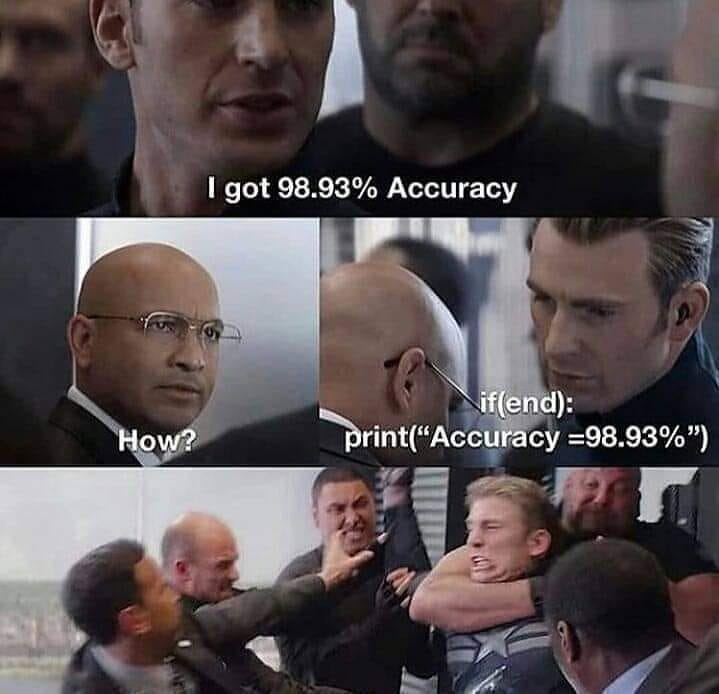


# **Trail 1**
## SVM model

In [29]:

# create object svm with standardscaler
clf = make_pipeline(StandardScaler(), SVC(kernel='rbf', C= 1, gamma= 2))

In [30]:
# training the model
clf = clf.fit(X_train,y_train)

In [31]:
clf.score(X_test,y_test)

0.7181818181818181

In [32]:
pred_test = clf.predict(test_)
pred_df = pd.DataFrame(data={'id': np.asarray(_id), 'rating': pred_test})
pred_df.to_csv('svm1.csv', index=False)
pred_test
pred_df.head()

,id,rating
0,937,4.0
1,270,4.0
2,308,4.0
3,913,4.0
4,403,4.0



# **Trail 2**
## SVM model

the first SVM model with hyperparameters (kernel = 'linear', C=10 , gamma=0.01 , probability=True) in this model i expect to give me score on the trainning data above 85% and the score on the testing data around 77%

In [33]:
#train the model with optimal hyperparameters
SVM_model_2 = SVC(kernel = 'rbf', C=10 , gamma=0.01 , random_state = 42 , probability=True)



In [34]:
# train model
SVM_model_2.fit(X_train, y_train)

SVC(C=10, gamma=0.01, probability=True, random_state=42)

In [35]:
#test the accuracy of model on test set
print('SVM_model Train Score is : ' , SVM_model_2.score(X_test, y_test))

SVM_model Train Score is :  0.7454545454545455


In [36]:
pred_test = clf.predict(test_)
pred_df = pd.DataFrame(data={'id': np.asarray(_id), 'rating': pred_test})
pred_df.to_csv('svm2.csv', index=False)
pred_test
pred_df.head()

,id,rating
0,937,4.0
1,270,4.0
2,308,4.0
3,913,4.0
4,403,4.0


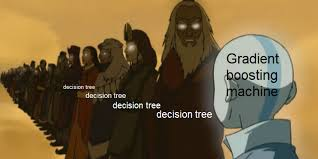



# **Trail 3**
## Decision Tree model




In [37]:
#set hyperparameters manually
Model_dt1 = tree.DecisionTreeClassifier(criterion='gini',max_depth=7)
#train the model
Model_dt1 = Model_dt1.fit(X_train,y_train)

In [38]:
Model_dt1.score(X_test,y_test)

0.7090909090909091

In [39]:
pred_test = clf.predict(test_)
pred_df = pd.DataFrame(data={'id': np.asarray(_id), 'rating': pred_test})
pred_df.to_csv('DT1.csv', index=False)
pred_test
pred_df.head()

,id,rating
0,937,4.0
1,270,4.0
2,308,4.0
3,913,4.0
4,403,4.0


# **Trail 4**
# Decision Tree model

In [40]:
Model_dt2 = tree.DecisionTreeClassifier(criterion='entropy',max_depth=4)
Model_dt2 = Model_dt2.fit(X_train,y_train)

In [41]:
Model_dt2.score(X_test,y_test)

0.7636363636363637

In [42]:
pred_test = Model_dt2.predict(test_)
pred_df = pd.DataFrame(data={'id': np.asarray(_id), 'rating': pred_test})
pred_df.to_csv('DT2.csv', index=False)
pred_test
pred_df.head()

,id,rating
0,937,1.0
1,270,4.0
2,308,4.0
3,913,4.0
4,403,4.0


# **Trail 5** 
## Decision Tree model

In [43]:
#train the model with selected hyperparameters
Model_dt3 = DecisionTreeClassifier(criterion= "gini", max_depth= 7 , min_samples_leaf= 2 , random_state=42)
Model_dt3.fit(X_test,y_test)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=2, random_state=42)

In [44]:
Model_dt3.score(X_test,y_test)

0.9181818181818182

In [45]:
pred_test = Model_dt3.predict(test_)
pred_df = pd.DataFrame(data={'id': np.asarray(_id), 'rating': pred_test})
pred_df.to_csv('DT3.csv', index=False)
pred_test
pred_df.head()

,id,rating
0,937,5.0
1,270,4.0
2,308,4.0
3,913,4.0
4,403,4.0


# **Trail 6**

# **Naive Bayes**

---

naive bayes classifier : assumes that there is independent relationship between features There is no hyperparameter tune in naive bayes




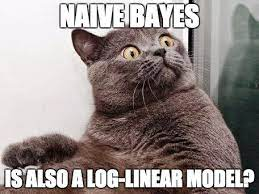

In [46]:

clf_naive = BernoulliNB()
clf_naive.fit(X_train,y_train)


BernoulliNB()

In [47]:
clf_naive.score(X_test,y_test)

0.7272727272727273

In [48]:
pred_nb = clf_naive.predict(X_test)

In [49]:
ClassificationReport = classification_report(y_test, pred_nb, zero_division = True)
print('Classification Report is : \n', ClassificationReport)

Classification Report is : 
               precision    recall  f1-score   support

         2.0       1.00      0.00      0.00         3
         3.0       1.00      0.00      0.00        11
         4.0       0.77      0.90      0.83        81
         5.0       0.47      0.47      0.47        15

    accuracy                           0.73       110
   macro avg       0.81      0.34      0.32       110
weighted avg       0.76      0.73      0.67       110



In [50]:
pred_test = clf_naive.predict(test_)
pred_df = pd.DataFrame(data={'id': np.asarray(_id), 'rating': pred_test})
pred_df.to_csv('nive_test.csv', index=False)
pred_test
pred_df.head()

# Score: 0.77824 kaggel

,id,rating
0,937,5.0
1,270,4.0
2,308,4.0
3,913,4.0
4,403,4.0


# **Questions**

### Q1) Why Data Mining is a misnomer? What is another preferred name?

---



The phrase "data mining" is misnomer because the goal is to extract patterns \
and knowledge from massive amounts of data rather than data extraction (mining)

It is largely concerned with detecting patterns and sounds inside datasets, although it has nothing to do with data extraction.
data mining also called **knowledge discovery** in databases.

# 2-What is the general knowledge discovery process?
---
process of extracting the important and interesting patterns or knowledge from huge amounts of data Knowledge Discovery Process may consist of the following steps :

1- Data cleaning and preprocessing in which noise or outliers and inconsistent data is removed. Strategies for handling missing data fields.

2- Data integration in which multiple data sources are combined.

3- Data selection or focusing on a subset of variables, or data samples, on which discovery is to be performed in which data relevant to the analysis task are retrieved from the database.

4- Data Transformation, data are transformed into forms appropriate for mining by performing summary or aggregation operations.

5- Data mining methods (algorithms) are applied in order to extract data patterns.

6- Pattern Evaluation, data patterns are identified based on some interesting measures.

7- Knowledge Presentation is represented to user using many knowledge representation techniques.


# What is the difference between a data engineer and data scientist/AI engineer?

---
Data scientists develop analytical models, while data engineers deploy those models in production. As such, data scientists focus primarily on analytics and solve business problems. , and data engineers focus more heavily on programming , also prepare data for production by converting raw, unstructured data into a structured format that can be analyzed and interpreted. data engineers craft custom tools to support big data analytics. At large companies that handle large, complex volumes of data, data engineers often focus on optimizing ETL (extract-transform-load) processes.


# 3-In data mining, what is the difference between prediction and categorization?

---
1- categorization from classification is mostly based on our current or past assumptions,detecting the class label correctly,based on a training dataset.

2- Prediction is about predicting a missing/unknown element(continuous value) of a dataset,how well a given predictor can guess the value of a predicated attribute for new data,are supposed to done with both classification and regression for the test data set.

# 4- Why data science/machine learning is a bad idea in the context of information security?

---
when security measures such as access control fail,attackers can easily take the data and make use of any information it contains,so This mean data is availabled in unencrypted form . To make this more difficult, the data should always be stored in encrypted form. This way, the attacker must steal the data when it is being processed or manage to steal the keys used to encrypt it.


# 5- What is CIA principle?

---
1- Confidentiality measures are designed to prevent sensitive information from unauthorized access attempts. It is common for data to be categorized according to the amount and type of damage that could be done if it fell into the wrong hands.

2- Integrity involves maintaining the consistency, accuracy and trustworthiness of data over its entire lifecycle. Data shouldn't be changed in transport, and steps must be taken to ensure data cannot be changed by unauthorized people

3- Availability means information should be consistently and readily accessible for authorized parties. This involves properly maintaining hardware and technical infrastructure and systems that hold and display the information.


# How can we use it to access the security/privacy aspect of the AI system/pipelines?

---
For Confidentiality Data encryption is common method of ensuring 
confidentiality and make user ID with strong passwords for your accounts,Keep access control lists and other file permissions up to date.


For integrity use backup and recovery software to restore the affected data to its correct state To ensure integrity, use version control, access control, security control, data logs and checksums.


For availability use preventive measures such as redundancy, failover .Systems and applications must be stayed updated. -Use network or server monitoring systems.
